# Лабораторная работа №1

## Исследование разложения функции в ряд Тейлора

### Задание

Дана функция:

$$ f(x) = 2 \log_{10}(x) - (x-2)^2 $$

Требуется:

1. Найти аналитические выражения для производных функции
2. Реализовать разложение в ряд Тейлора второго порядка
3. Визуализировать результаты приближения

## Теоретическая часть

### Исходная функция

$$ f(x) = 2 \log_{10}(x) - (x-2)^2 $$

### Вычисление производных

**Первая производная:**

$$ f'(x) = \frac{d}{dx}\left[2 \log_{10}(x)\right] - \frac{d}{dx}\left[(x-2)^2\right] $$

$$ f'(x) = \frac{2}{x \ln(10)} - 2(x-2) $$

**Вторая производная:**

$$ f''(x) = \frac{d}{dx}\left[\frac{2}{x \ln(10)}\right] - \frac{d}{dx}\left[2(x-2)\right] $$

$$ f''(x) = -\frac{2}{x^2 \ln(10)} - 2 $$

### Разложение в ряд Тейлора

Ряд Тейлора второго порядка в точке $x_0$:

$$ f(x) \approx f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)(x - x_0)^2}{2!} $$

## Практическая реализация

In [2]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D
from typing import Union
import sympy as sp

In [3]:
# Определение функции и её производных
def f(x: Union[np.ndarray, float]) -> Union[np.ndarray, float]:
    """
    Вычисляет значение функции f(x) = 2*log₁₀(x) - (x-2)².
    
    Parameters:
    x : значение или массив значений аргумента
    
    Returns:
    Значение функции в точке x
    """
    return 2 * np.log10(x) - np.power(x - 2, 2)

# Символьное вычисление производных с использованием SymPy
x = sp.symbols('x')
f_sym = 2 * sp.log(x, 10) - (x - 2)**2

# Первая производная
df_1_sym = sp.diff(f_sym, x)
df_1_func = sp.lambdify(x, df_1_sym, 'numpy')

# Вторая производная
df_2_sym = sp.diff(df_1_sym, x)
df_2_func = sp.lambdify(x, df_2_sym, 'numpy')

In [4]:
# Реализация разложения в ряд Тейлора
def f_taylor(x: Union[np.ndarray, float], x_0: float) -> Union[np.ndarray, float]:
    """
    Вычисляет приближение функции f(x) с использованием разложения
    в ряд Тейлора второго порядка в точке x₀.
    
    f(x) ≈ f(x₀) + f'(x₀)(x-x₀) + f''(x₀)(x-x₀)²/2!
    
    Parameters:
    x : значение или массив значений аргумента
    x_0 : точка разложения ряда Тейлора
    
    Returns:
    Приближенное значение функции в точке x
    """
    return f(x_0) + df_1_func(x_0) * (x - x_0) + (df_2_func(x_0) * np.power(x - x_0, 2)) / 2

In [5]:
taylor = f(x_0) + df_1_func(x_0) * (x - x_0) + (df_2_func(x_0) * np.power(x - x_0, 2)) / 2
taylor.expand()

NameError: name 'x_0' is not defined

$$x_0 = 3$$

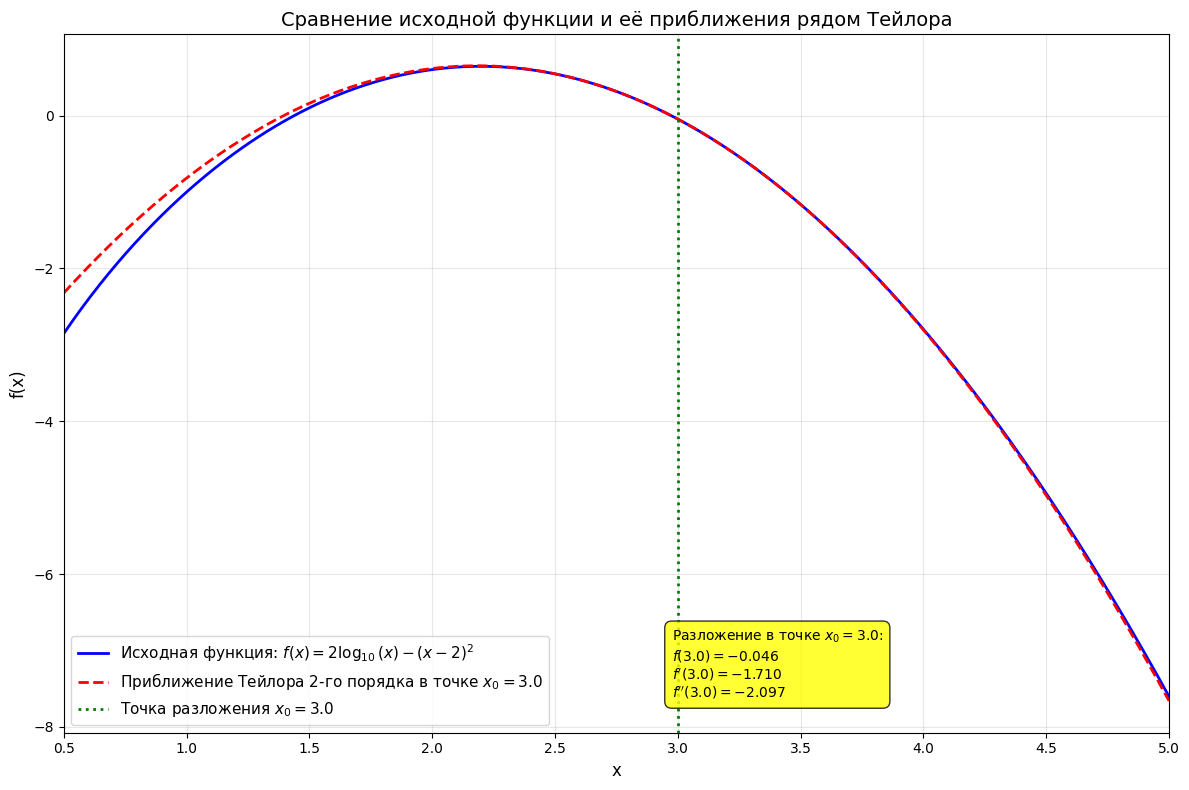

In [ ]:
# Параметры исследования
x_0 = 3.0  # Точка разложения ряда Тейлора
x_min = 0.5  # Минимальное значение x (избегаем log(0))
x_max = 5.0  # Максимальное значение x
n_points = 500  # Количество точек для построения графиков

# Создание массива значений x
x_values = np.linspace(x_min, x_max, n_points)

# Вычисление значений исходной функции
y_original = f(x_values)

# Вычисление значений приближения Тейлора
y_taylor = f_taylor(x_values, x_0)

# Построение графиков
plt.figure(figsize=(12, 8))

# График исходной функции
plt.plot(x_values, y_original,
         label='Исходная функция: $f(x) = 2\\log_{10}(x) - (x-2)^2$',
         color='blue',
         linewidth=2)

# График приближения Тейлора
plt.plot(x_values, y_taylor,
         label=f'Приближение Тейлора 2-го порядка в точке $x_0 = {x_0}$',
         color='red',
         linestyle='--',
         linewidth=2)

# Вертикальная линия в точке разложения
plt.axvline(x=x_0,
            color='green',
            linestyle=':',
            linewidth=2,
            label=f'Точка разложения $x_0 = {x_0}$')

# Настройка графика
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Сравнение исходной функции и её приближения рядом Тейлора', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)

# Добавление текста с формулами
text_str = f'''Разложение в точке $x_0 = {x_0}$:
$f({x_0}) = {f(x_0):.3f}$
$f'({x_0}) = {df_1_func(x_0):.3f}$
$f''({x_0}) = {df_2_func(x_0):.3f}$'''

plt.text(0.55, 0.05, text_str,
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

## Исследование разложения функции в ряд Тейлора

Положим $x = a_1x_1 + a_2x_2$, где $a_1 = 2$, $a_2 = -7$

## Функция и её первая производная

Исходная функция:
$$f(x) = 2 \log_{10}(x) - (x-2)^2$$
где $x = 2x_1 - 7x_2$

Первая производная по $x$:
$$\frac{df}{dx} = \frac{2}{x \ln 10} - 2(x-2)$$

## Частные производные первого порядка

### Производная по $x_1$:
$$\frac{\partial f}{\partial x_1} = \frac{df}{dx} \cdot \frac{\partial x}{\partial x_1} = \left(\frac{2}{x \ln 10} - 2(x-2)\right) \cdot 2$$

### Производная по $x_2$:
$$\frac{\partial f}{\partial x_2} = \frac{df}{dx} \cdot \frac{\partial x}{\partial x_2} = \left(\frac{2}{x \ln 10} - 2(x-2)\right) \cdot (-7)$$

## Вторая производная по $x$

Вторая производная исходной функции:
$$\frac{d^2f}{dx^2} = \frac{d}{dx}\left(\frac{2}{x \ln 10} - 2(x-2)\right) = -\frac{2}{x^2 \ln 10} - 2$$

## Частные производные второго порядка

### Вторая производная по $x_1$:
$$\frac{\partial^2 f}{\partial x_1^2} = \frac{\partial}{\partial x_1}\left(\frac{\partial f}{\partial x_1}\right) = \frac{\partial}{\partial x_1}\left[2\left(\frac{2}{x \ln 10} - 2(x-2)\right)\right]$$
$$= 2 \cdot \left(-\frac{2}{x^2 \ln 10} - 2\right) \cdot \frac{\partial x}{\partial x_1} = 2 \cdot \left(-\frac{2}{x^2 \ln 10} - 2\right) \cdot 2$$
$$= 4\left(-\frac{2}{x^2 \ln 10} - 2\right) = -\frac{8}{x^2 \ln 10} - 8$$

### Вторая производная по $x_2$:
$$\frac{\partial^2 f}{\partial x_2^2} = \frac{\partial}{\partial x_2}\left(\frac{\partial f}{\partial x_2}\right) = \frac{\partial}{\partial x_2}\left[-7\left(\frac{2}{x \ln 10} - 2(x-2)\right)\right]$$
$$= -7 \cdot \left(-\frac{2}{x^2 \ln 10} - 2\right) \cdot \frac{\partial x}{\partial x_2} = -7 \cdot \left(-\frac{2}{x^2 \ln 10} - 2\right) \cdot (-7)$$
$$= 49\left(-\frac{2}{x^2 \ln 10} - 2\right) = -\frac{98}{x^2 \ln 10} - 98$$

### Смешанная производная по $x_1$ и $x_2$:
$$\frac{\partial^2 f}{\partial x_1 \partial x_2} = \frac{\partial}{\partial x_1}\left(\frac{\partial f}{\partial x_2}\right) = \frac{\partial}{\partial x_1}\left[-7\left(\frac{2}{x \ln 10} - 2(x-2)\right)\right]$$
$$= -7 \cdot \left(-\frac{2}{x^2 \ln 10} - 2\right) \cdot \frac{\partial x}{\partial x_1} = -7 \cdot \left(-\frac{2}{x^2 \ln 10} - 2\right) \cdot 2$$
$$= -14\left(-\frac{2}{x^2 \ln 10} - 2\right) = \frac{28}{x^2 \ln 10} + 28$$

### Смешанная производная по $x_2$ и $x_1$:
$$\frac{\partial^2 f}{\partial x_2 \partial x_1} = \frac{\partial^2 f}{\partial x_1 \partial x_2} = \frac{28}{x^2 \ln 10} + 28$$

## Окончательные выражения (с подстановкой $x = 2x_1 - 7x_2$)

### Первые производные:
$$\frac{\partial f}{\partial x_1} = 2\left(\frac{2}{(2x_1 - 7x_2) \ln 10} - 2(2x_1 - 7x_2 - 2)\right)$$
$$\frac{\partial f}{\partial x_2} = -7\left(\frac{2}{(2x_1 - 7x_2) \ln 10} - 2(2x_1 - 7x_2 - 2)\right)$$

### Вторые производные:
$$\frac{\partial^2 f}{\partial x_1^2} = -\frac{8}{(2x_1 - 7x_2)^2 \ln 10} - 8$$
$$\frac{\partial^2 f}{\partial x_2^2} = -\frac{98}{(2x_1 - 7x_2)^2 \ln 10} - 98$$
$$\frac{\partial^2 f}{\partial x_1 \partial x_2} = \frac{28}{(2x_1 - 7x_2)^2 \ln 10} + 28$$
$$\frac{\partial^2 f}{\partial x_2 \partial x_1} = \frac{28}{(2x_1 - 7x_2)^2 \ln 10} + 28$$

$$x = 2x_1 - 7x_2 = 3$$
$$x_1 = (3+7x_2)/2$$

In [6]:
x1, x2 = sp.symbols('x1 x2')
x_2d = 2*x1 - 7*x2
f_sym_2d = f_sym.subs(x, x_2d)

# Первая производная
df_x1_2d = sp.diff(f_sym_2d, x1)
df_x2_2d = sp.diff(f_sym_2d, x2)

df_1_func = sp.lambdify(x, df_1_sym, 'numpy')

# Вторые производные
df_x1_x1_2d = sp.diff(df_x1_2d, x1)
df_x1_x2_2d = sp.diff(df_x1_2d, x2)
df_x2_x2_2d = sp.diff(df_x2_2d, x2)


In [ ]:
# Определение символьных переменных
x1, x2 = sp.symbols('x1 x2')

# Определение функции
f_sym = 2 * sp.log(x1, 10) - (x1 - 2)**2

# Создание переменной суммы символьных переменных
x_2d = 2*x1 - 7*x2

# Подстановка переменной суммы в функцию
f_sym_2d = f_sym.subs(x1, x_2d)
f_2d_np = sp.lambdify((x1, x2),f_sym_2d , 'numpy')

# Первая производная
df_x1_2d_symb = sp.diff(f_sym_2d, x1)
df_x2_2d_symb = sp.diff(f_sym_2d, x2)

# Вторые производные
df_x1_x1_2d_symb = sp.diff(df_x1_2d_symb, x1)
df_x1_x2_2d_symb = sp.diff(df_x1_2d_symb, x2)
df_x2_x2_2d_symb = sp.diff(df_x2_2d_symb, x2)

# Преобразование символьных выражений в функции для численных вычислений
df_x1_2d_func = sp.lambdify((x1, x2), df_x1_2d_symb, 'numpy')
df_x2_2d_func = sp.lambdify((x1, x2), df_x2_2d_symb, 'numpy')
df_x1_x1_2d_func = sp.lambdify((x1, x2), df_x1_x1_2d_symb, 'numpy')
df_x1_x2_2d_func = sp.lambdify((x1, x2), df_x1_x2_2d_symb, 'numpy')
df_x2_x2_2d_func = sp.lambdify((x1, x2), df_x2_x2_2d_symb, 'numpy')


$$x_1 = 12$$
$$x_2 = 3$$

In [ ]:
a1_val = 12  # Числовое значение
a2_val = 3   # Числовое значение

# Вычисляем значения функции и производных в точке (a1_val, a2_val)
f_val = f_sym_2d.subs({x1: a1_val, x2: a2_val})
df_dx1_val = df_x1_2d_symb.subs({x1: a1_val, x2: a2_val})
df_dx2_val = df_x2_2d_symb.subs({x1: a1_val, x2: a2_val})
d2f_dx1_val = df_x1_x1_2d_symb.subs({x1: a1_val, x2: a2_val})
d2f_dx1x2_val = df_x1_x2_2d_symb.subs({x1: a1_val, x2: a2_val})
d2f_dx2_val = df_x2_x2_2d_symb.subs({x1: a1_val, x2: a2_val})

# Собираем ряд Тейлора 2-го порядка
# Здесь (x1 - a1_val) и (x2 - a2_val) - это уже символьные выражения
taylor_series_2d = (
    f_val +
    df_dx1_val * (x1 - a1_val) +
    df_dx2_val * (x2 - a2_val) +
    (1/2) * (
        d2f_dx1_val * (x1 - a1_val)**2 +
        2 * d2f_dx1x2_val * (x1 - a1_val)*(x2 - a2_val) +
        d2f_dx2_val * (x2 - a2_val)**2
    )
)

In [ ]:
taylor_series_2d_np = sp.lambdify((x1, x2), taylor_series_2d, 'numpy')

Вычисляем значения функций...
Создаем визуализацию...


<lambdifygenerated-4>:2: RuntimeWarning: invalid value encountered in log
  return -(2*x1 - 7*x2 - 2)**2 + 2*log(2*x1 - 7*x2)/log(10)


Создаем анимацию...
Сохраняем видео...
✅ Видео успешно сохранено как plot.mp4

АНАЛИЗ ТОЧНОСТИ АППРОКСИМАЦИИ:
Диапазон x1: 11.0 - 13.0
Диапазон x2: 2.5 - 3.5
Максимальная ошибка: 4.852580
Средняя ошибка: 0.159426
Относительная ошибка: 2.86%


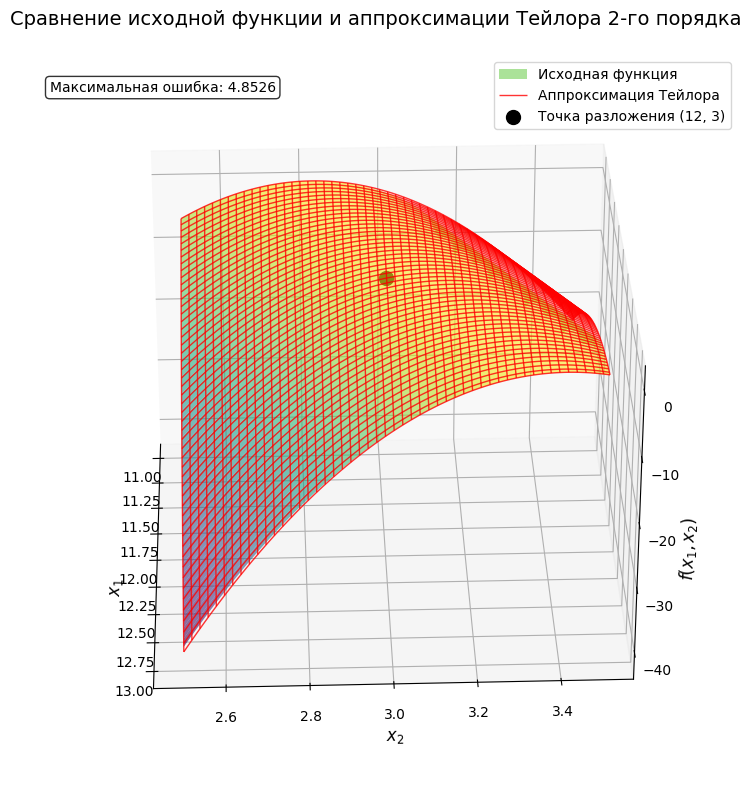

In [ ]:
# Создаем сетку вокруг точки (12, 3)
x1_range = np.linspace(11, 13, 200)  # Уменьшил разрешение для скорости
x2_range = np.linspace(2.5, 3.5, 200)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Вычисляем значения функций
print("Вычисляем значения функций...")
Z_original = f_2d_np(X1, X2)
Z_taylor = taylor_series_2d_np(X1, X2)

# Создаем фигуру и 3D оси
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Отображаем исходную функцию (полупрозрачная)
print("Создаем визуализацию...")
surf1 = ax.plot_surface(X1, X2, Z_original, cmap='viridis', 
                       alpha=0.6, label='Исходная функция', antialiased=True)

# Отображаем аппроксимацию Тейлора (сетка)
surf2 = ax.plot_wireframe(X1, X2, Z_taylor, color='red', 
                         linewidth=1, label='Аппроксимация Тейлора', alpha=0.8)

# Отмечаем точку разложения
point = ax.scatter([12], [3], [f_2d_np(12, 3)], color='black', s=100, 
                  marker='o', label='Точка разложения (12, 3)')

# Настраиваем график
ax.set_title('Сравнение исходной функции и аппроксимации Тейлора 2-го порядка\n', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('$f(x_1, x_2)$', fontsize=12)

# Добавляем легенду
ax.legend()

# Добавляем информацию об ошибке
diff = Z_original - Z_taylor
diff = diff[~np.isnan(diff)]
error = np.max(np.abs(diff))
ax.text2D(0.05, 0.95, f'Максимальная ошибка: {error:.4f}', 
          transform=ax.transAxes, fontsize=10,
          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()

# Функция для анимации вращения
def update(frame):
    ax.view_init(elev=30, azim=frame)
    return fig,

# Создаем анимацию
print("Создаем анимацию...")
frames = np.arange(0, 360, 2)  # Полный оборот с шагом 2 градуса
animation = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

# Сохраняем как видео
print("Сохраняем видео...")
try:
    # Пытаемся использовать ffmpeg
    writer = FFMpegWriter(fps=20, metadata=dict(artist='Matplotlib'), bitrate=1800)
    animation.save("plot.mp4", writer=writer)
    print("✅ Видео успешно сохранено как plot.mp4")
    
except ImportError:
    print("FFmpeg не установлен, пробуем альтернативный метод...")
    try:
        # Альтернативный метод
        animation.save("plot.mp4", fps=20, extra_args=['-vcodec', 'libx264'])
        print("✅ Видео успешно сохранено как plot.mp4")
    except:
        print("❌ Не удалось сохранить видео. Установите ffmpeg:")
        print("Для Windows: скачайте с https://ffmpeg.org/download.html")
        print("Для Linux: sudo apt-get install ffmpeg")
        print("Для Mac: brew install ffmpeg")

# Дополнительная информация
print("\n" + "="*50)
print("АНАЛИЗ ТОЧНОСТИ АППРОКСИМАЦИИ:")
print("="*50)
print(f"Диапазон x1: {x1_range[0]:.1f} - {x1_range[-1]:.1f}")
print(f"Диапазон x2: {x2_range[0]:.1f} - {x2_range[-1]:.1f}")
print(f"Максимальная ошибка: {np.max(np.abs(diff)):.6f}")
print(f"Средняя ошибка: {np.mean(np.abs(diff)):.6f}")
print(f"Относительная ошибка: {np.mean(np.abs(diff))/np.mean(np.abs(Z_original[~np.isnan(Z_original)]))*100:.2f}%")